In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb

from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder
# from imblearn import over_sampling
# from imblearn.over_sampling import RandomOverSampler
from imblearn import combine
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# Read csv ke dalam dataframe
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
# Deskripsi dari setiap atribut di dataset
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
# Cek null value, jika ada maka akan di drop
n_val = df.isnull().sum()
print(n_val)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [5]:
# Encode data kategorikal (Month, VisitorType, Weekend, Revenue) di sini pake LabelEncoder
encode_attribute = ['Month', 'VisitorType', 'Weekend', 'Revenue']
LE = LabelEncoder()
for i in encode_attribute:
    df[i] = LE.fit_transform(df[i])

# Cek data setelah diencode
df.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,4,1,9,3,2,0,0


In [6]:
# Remove duplicate data
df.drop_duplicates(inplace=True)
df.shape

(12205, 18)

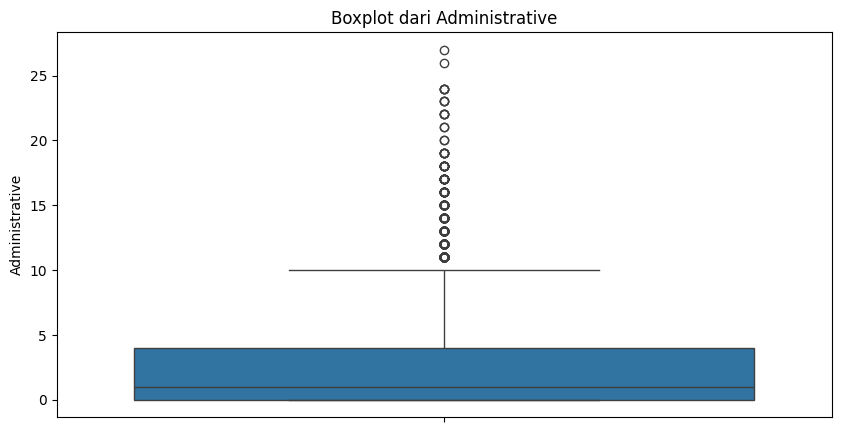

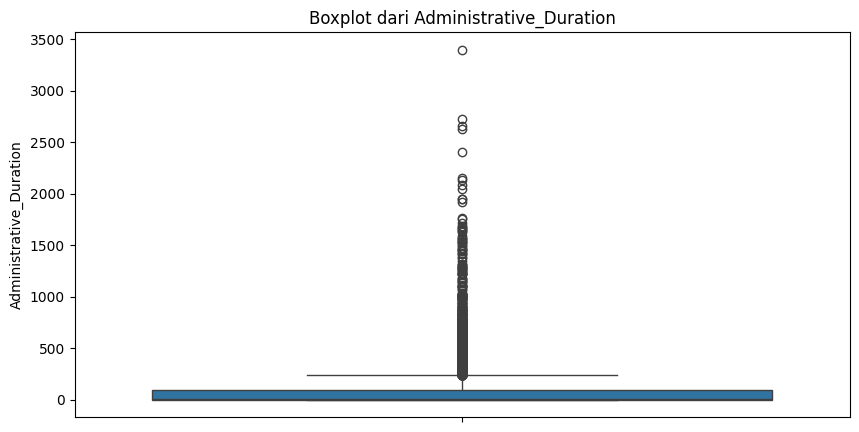

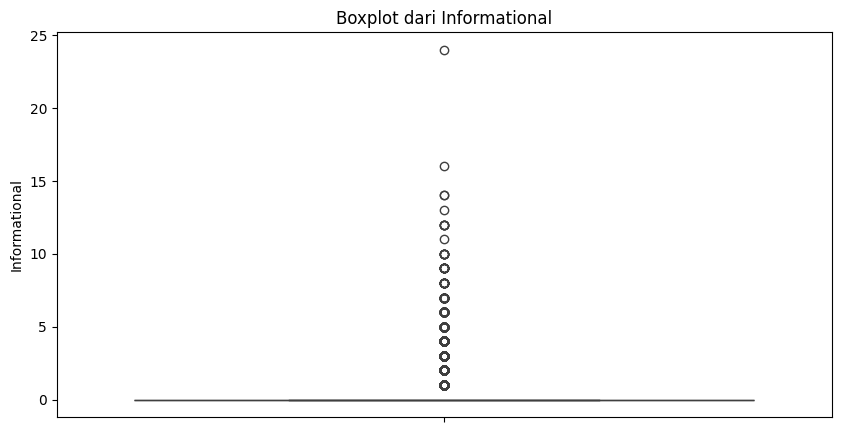

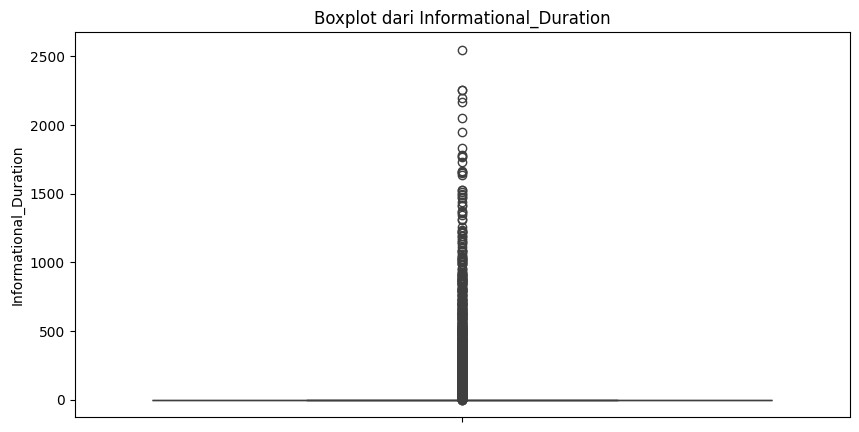

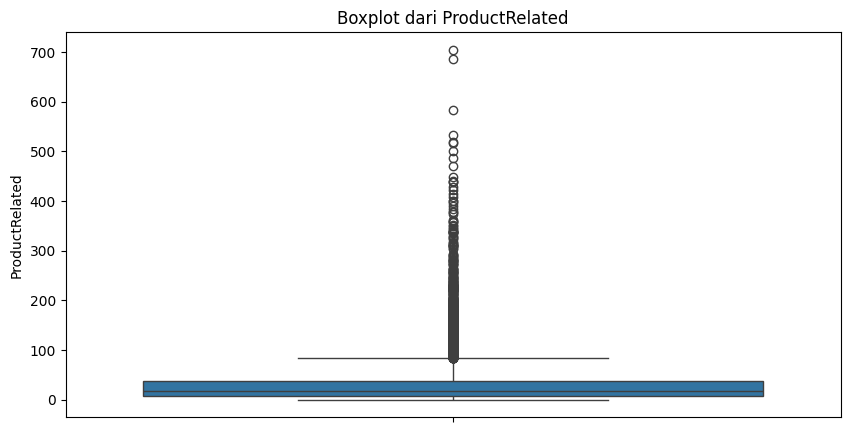

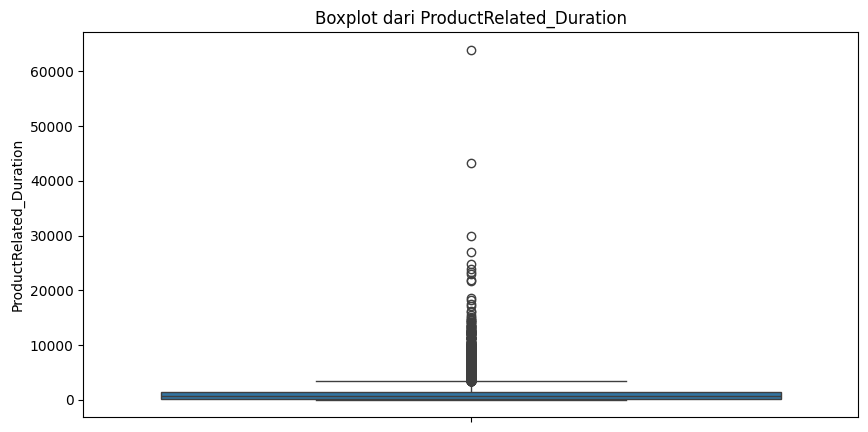

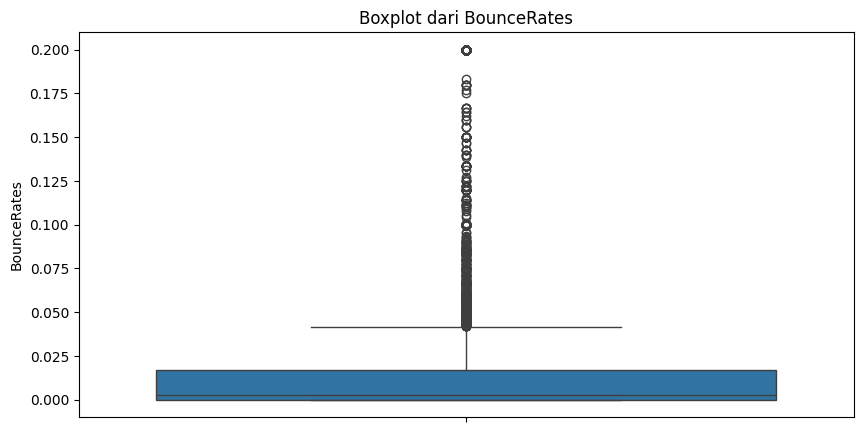

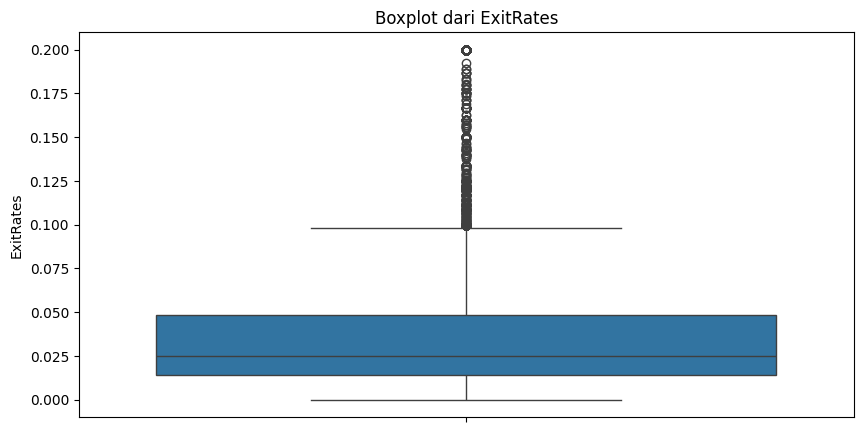

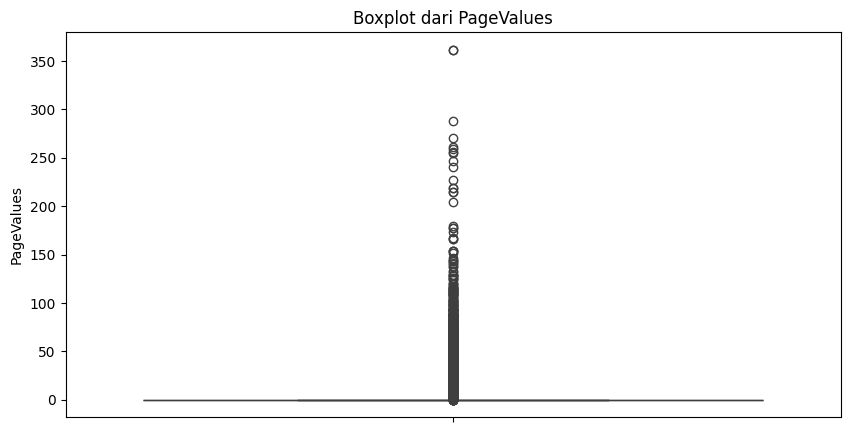

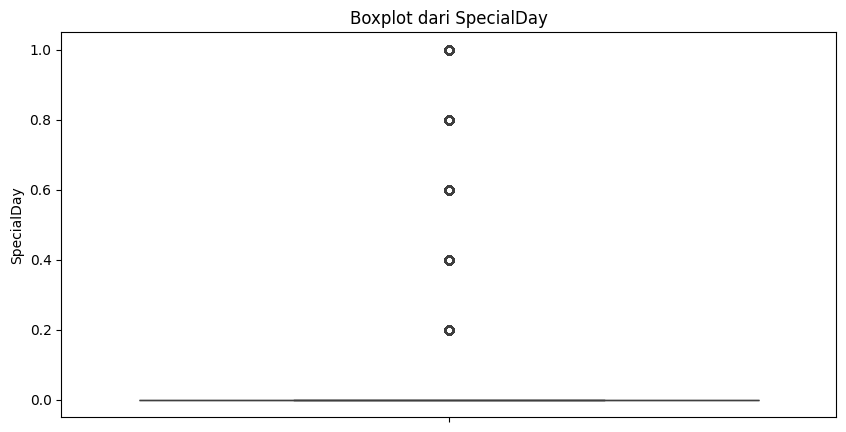

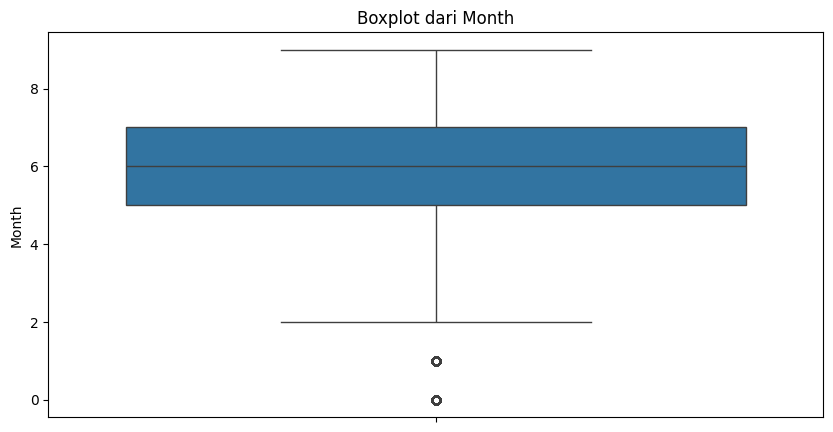

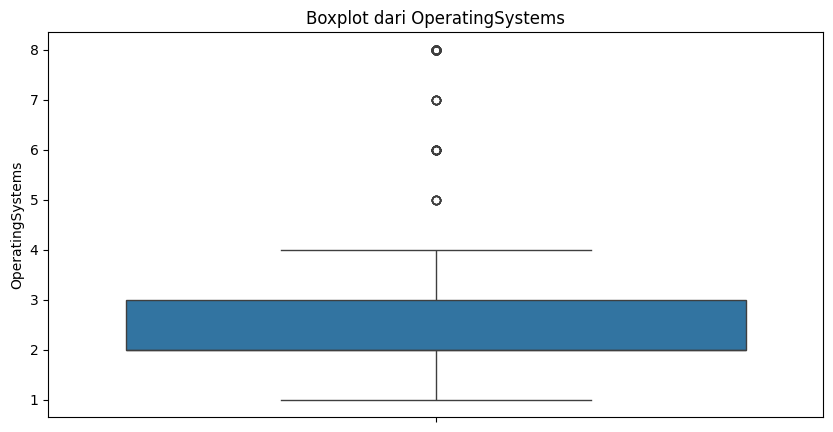

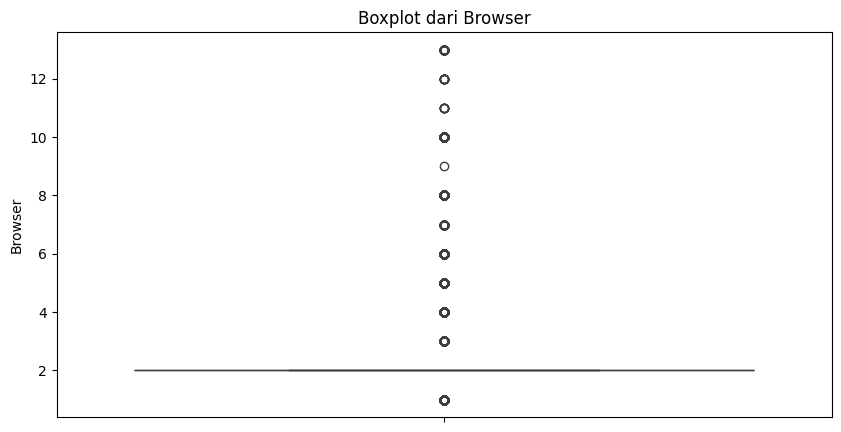

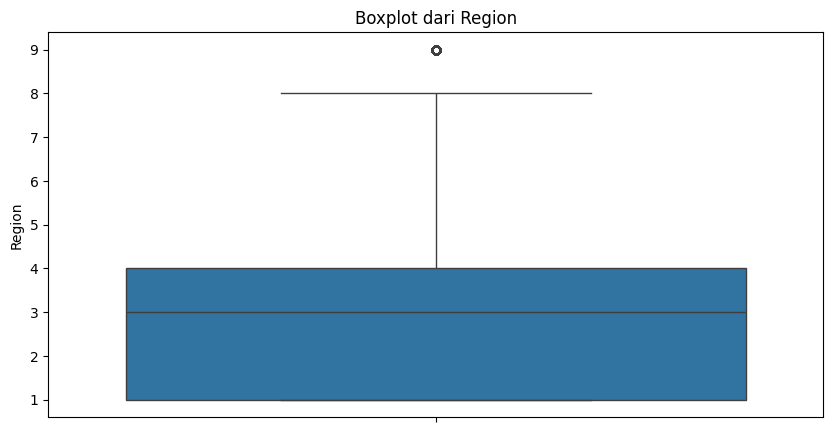

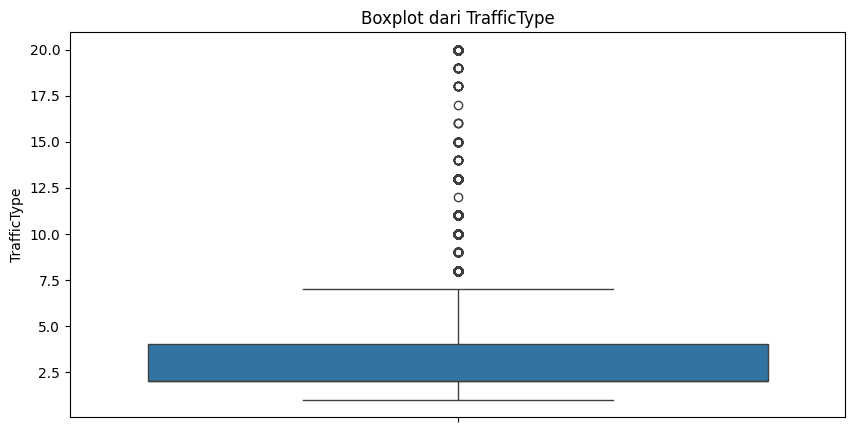

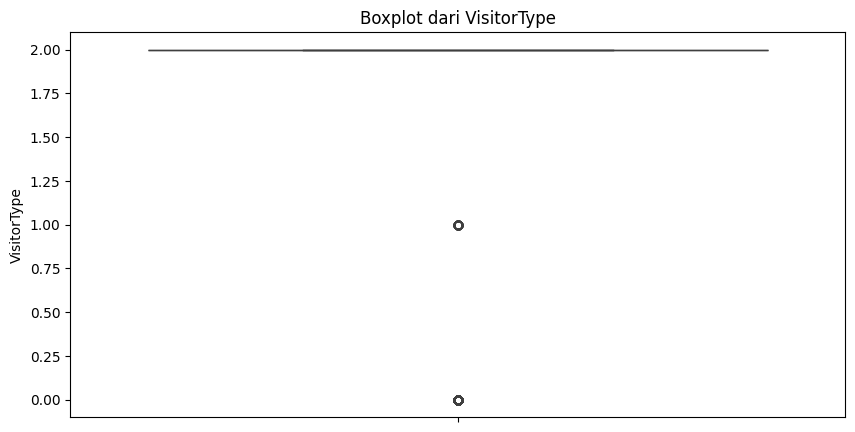

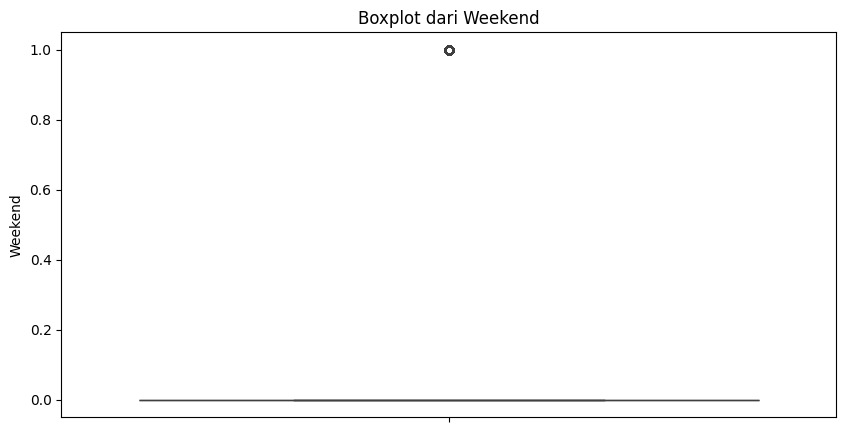

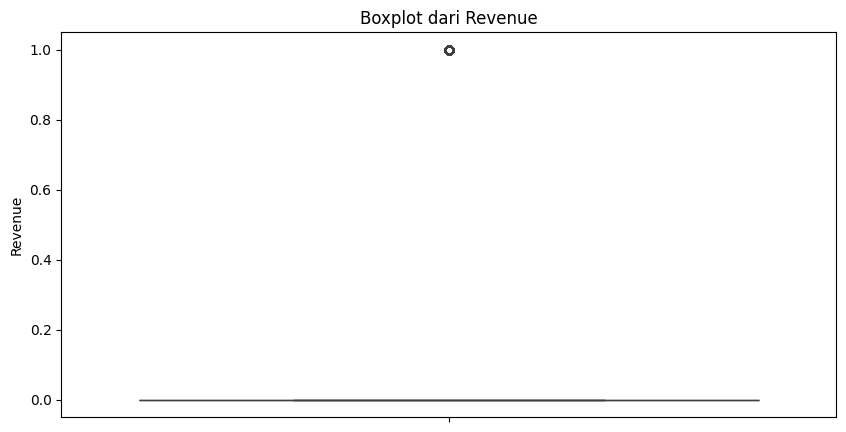

In [7]:
for i in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[i])
    plt.title('Boxplot dari ' + i)
    plt.show()

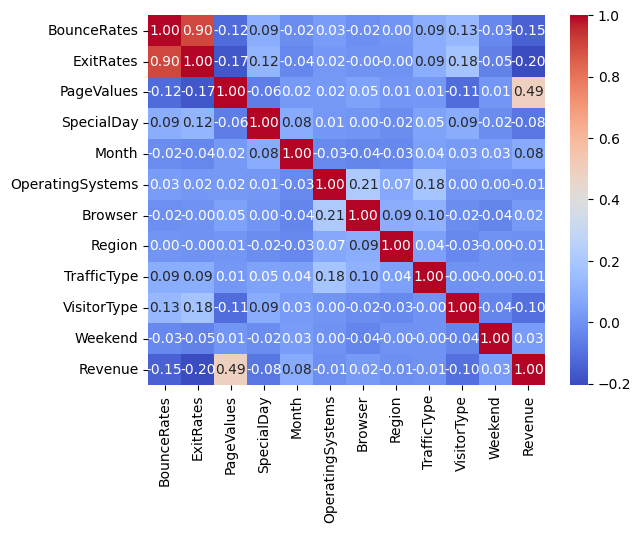

In [8]:
# Cek korelasi antar atribut (index 6-18)
corr_matrix = df.corr()
selected_cols = corr_matrix.iloc[6:18:, 6:18:]
sns.heatmap(selected_cols, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [9]:
# Menghilangkan outlier dengan menggunakan metode IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Placeholder untuk cek outlier di kolom Administrative_Duration dan ProductRelated_Duration
data_no_outliers = remove_outliers_iqr(df, 'Administrative_Duration')
data_no_outliers2 = remove_outliers_iqr(df, 'ProductRelated_Duration')

# df.shape
# rows_before = df.shape[0]
# rows_after = data_no_outliers.shape[0]
# rows_before, rows_after

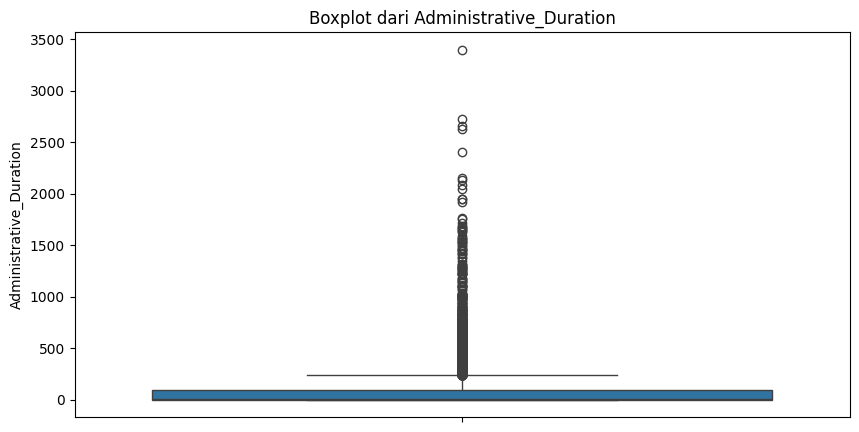

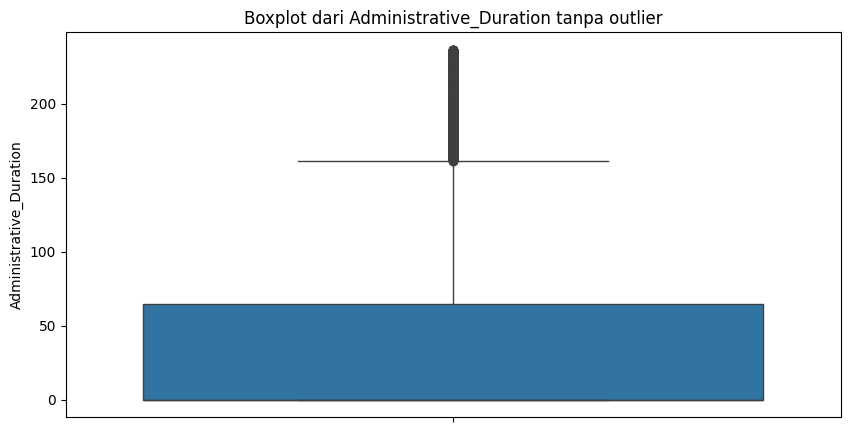

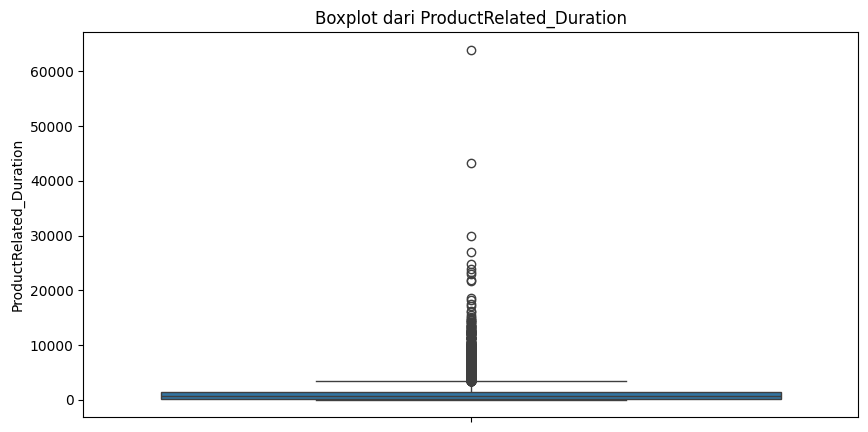

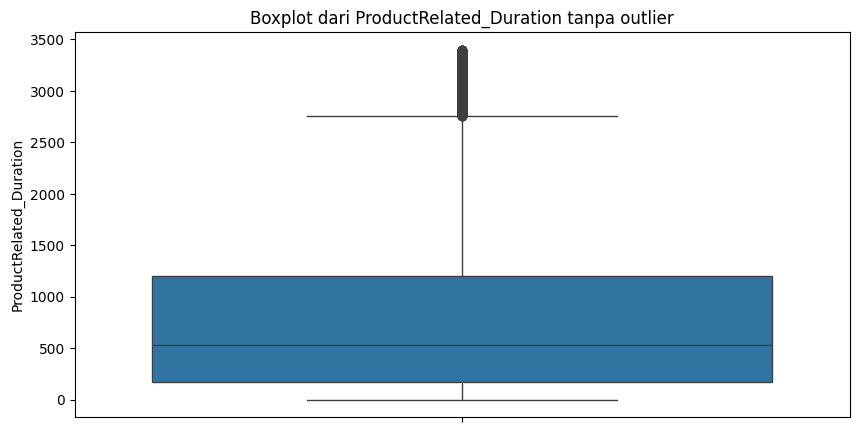

In [10]:
# Boxplot sebelum dan sesudah dihilangkan outlier
plt.figure(figsize=(10, 5))
sns.boxplot(data=df['Administrative_Duration'])
plt.title('Boxplot dari Administrative_Duration')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=data_no_outliers['Administrative_Duration'])
plt.title('Boxplot dari Administrative_Duration tanpa outlier')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df['ProductRelated_Duration'])
plt.title('Boxplot dari ProductRelated_Duration')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=data_no_outliers2['ProductRelated_Duration'])
plt.title('Boxplot dari ProductRelated_Duration tanpa outlier')
plt.show()

In [11]:
# Menghilangkan outlier di kolom Administrative_Duration dan ProductRelated_Duration di dataframe
df = remove_outliers_iqr(df, 'Administrative_Duration')
df = remove_outliers_iqr(df, 'ProductRelated_Duration')

In [12]:
# Pilih features ama target variable. Di sini target variable nya 'Revenue'
# Feature importance dari special day dan browser kecil, jadi didrop
X = df.drop('Revenue', axis=1)
y = df['Revenue']

Class distribution:
Revenue
0    8830
1    1390
Name: count, dtype: int64

X shape: (10220, 17)


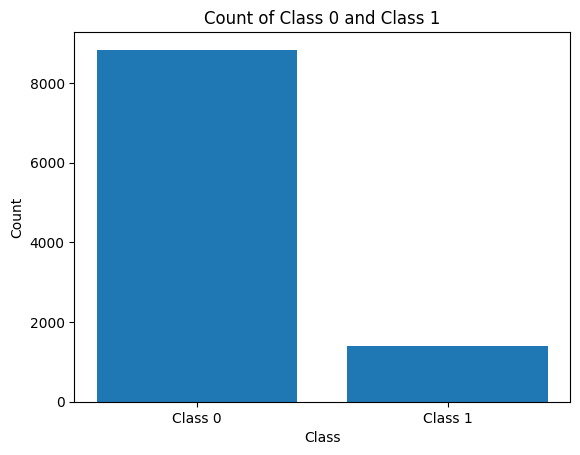

In [13]:
# Dilihat bahwa class 0 lebih banyak dari class 1 sehingga terjadi imbalance.
# Teknik yang digunakan untuk ini adalah oversampling karena kalau pake undersampler.
# Data yang dihasilkan akan berkurang dan bisa jadi data yang dihasilkan tidak representatif.
class_dist = y.value_counts()
X_shape = X.shape
print(f'Class distribution:\n{class_dist}\n\nX shape: {X_shape}')

# Jumlah class 0 and 1
class_count = [8830, 1390]

# Bar chart
plt.bar(['Class 0', 'Class 1'], class_count)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Class 0 and Class 1')
plt.show()

In [14]:
# Hybrid Sampling (SMOTEENN)
sm_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = sm_enn.fit_resample(X, y)

# Splitting dengan resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Cek target variable setelah oversampling
y_resampled.value_counts()

Revenue
1    7950
0    6560
Name: count, dtype: int64

In [15]:
# Normalisasi data dengan StandardScaler
# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.transform(X_test)

# Normalisasi data dengan RobustScaler
RScaler = RobustScaler()
X_train = RScaler.fit_transform(X_train)
X_test = RScaler.transform(X_test)

normalized_Xtrain = pd.DataFrame(X_train, columns=X.columns)
print(normalized_Xtrain)

       Administrative  Administrative_Duration  Informational  \
0            1.666667                 1.730893            0.0   
1           -0.333333                -0.097042            0.0   
2            2.333333                 1.160811            0.0   
3            1.000000                 3.133420            0.0   
4           -0.333333                -0.097042            0.0   
...               ...                      ...            ...   
11603        0.333333                 1.308587            0.0   
11604       -0.333333                -0.025223            0.0   
11605       -0.333333                -0.097042            0.0   
11606       -0.333333                -0.097042            0.0   
11607        1.666667                 1.020063            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0       -0.227273                -0.442293   
1                         0.0       -0.454545                -0.507026 

In [16]:
# Klasifikasi dengan XGBoost
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
# XGBoost accuracy
xgb_predict = xgb_classifier.predict(X_test)
xgb_accuracy = classification_report(y_test, xgb_predict)
print(xgb_accuracy)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1340
           1       0.98      0.98      0.98      1562

    accuracy                           0.98      2902
   macro avg       0.98      0.98      0.98      2902
weighted avg       0.98      0.98      0.98      2902



In [18]:
# Klasifikasi dengan Decision Tree
dtree_classifier = DecisionTreeClassifier()
dtree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
# Decision tree accuracy
dtree_predict = dtree_classifier.predict(X_test)
dtree_accuracy = classification_report(y_test, dtree_predict)
print(dtree_accuracy)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1340
           1       0.95      0.97      0.96      1562

    accuracy                           0.96      2902
   macro avg       0.96      0.95      0.96      2902
weighted avg       0.96      0.96      0.96      2902



In [20]:
# Klasifikasi dengan Random Forest
rforest_classifier = RandomForestClassifier(max_depth=7, random_state=42)
rforest_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [21]:
# Random Forest accuracy
rforest_predict = rforest_classifier.predict(X_test)
rforest_accuracy = classification_report(y_test, rforest_predict)
print(rforest_accuracy)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1340
           1       0.97      0.95      0.96      1562

    accuracy                           0.96      2902
   macro avg       0.96      0.96      0.96      2902
weighted avg       0.96      0.96      0.96      2902



In [22]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[ 2044  2045  2046 ... 10217 10218 10219]
  Test:  index=[   0    1    2 ... 2041 2042 2043]
Fold 1:
  Train: index=[    0     1     2 ... 10217 10218 10219]
  Test:  index=[2044 2045 2046 ... 4085 4086 4087]
Fold 2:
  Train: index=[    0     1     2 ... 10217 10218 10219]
  Test:  index=[4088 4089 4090 ... 6129 6130 6131]
Fold 3:
  Train: index=[    0     1     2 ... 10217 10218 10219]
  Test:  index=[6132 6133 6134 ... 8173 8174 8175]
Fold 4:
  Train: index=[   0    1    2 ... 8173 8174 8175]
  Test:  index=[ 8176  8177  8178 ... 10217 10218 10219]


In [23]:
# Cross Validation dengan XGBoost
from sklearn.model_selection import cross_val_score

classifier = xgb.XGBClassifier()

scores = cross_val_score(classifier, X_train, y_train, cv=5)

for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")

print("Mean Accuracy:", scores.mean())

Fold 1: 0.9694229112833764
Fold 2: 0.975452196382429
Fold 3: 0.9681309216192937
Fold 4: 0.967255493321844
Fold 5: 0.9715639810426541
Mean Accuracy: 0.9703651007299194


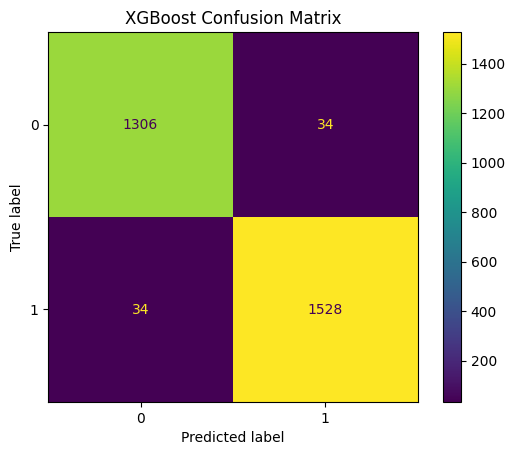

In [24]:
# Confusion matrix dari XGB
cm_xgb = confusion_matrix(xgb_predict, y_test)
confDisplay = ConfusionMatrixDisplay(cm_xgb).plot()
plt.title('XGBoost Confusion Matrix')
plt.show()

In [25]:
from sklearn.metrics import f1_score

# F1 Score dari XGB
f1 = f1_score(xgb_predict, y_test)
print(f1)

0.9782330345710627


In [26]:
# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train, columns=X.columns)

model = xgb.XGBClassifier()
model.fit(X_train_df, y_train)

importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

                    Feature  Importance
8                PageValues    0.678907
15              VisitorType    0.072755
10                    Month    0.026340
0            Administrative    0.025215
1   Administrative_Duration    0.019365
6               BounceRates    0.019002
11         OperatingSystems    0.018908
5   ProductRelated_Duration    0.018125
2             Informational    0.017503
12                  Browser    0.015472
16                  Weekend    0.014908
3    Informational_Duration    0.014271
9                SpecialDay    0.014007
4            ProductRelated    0.013050
7                 ExitRates    0.011224
14              TrafficType    0.010827
13                   Region    0.010120
